In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from custom_dataloader import replicate_data, replicate_data_single
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay


In [3]:
CIII = True # Train with Class III as a possible class
# YSO_EG_Stars Train
file_inp = "c2d_w_quality.csv"
input = pd.read_csv(file_inp)
bands = [idx for idx in input.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]
bands = bands[:-2]
bands.append("alpha")
# print(f"YSO shape: {input[input['Target']==0].shape}")
# print(f"EG shape: {input[input['Target']==1].shape}")
# print(f"Star shape: {input[input['Target']==2].shape}")


# input['Target']=preproc_yso(input[['alpha']].values,input[['Target']].values,CIII)

inp_tr, tar_tr,inp_va, tar_va,inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,10000])# 171,133,693,219,1974,2500
while np.all(np.isfinite(inp_tr)) == False:
    inp_tr, tar_tr, inp_va, tar_va, inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,10000])# 171,133,693,219,1974,2500
# print('Assigned training, validation, and test sets.')



In [4]:
rf = RandomForestClassifier()

rf.fit(inp_tr,tar_tr.ravel())

pred_tr = rf.predict(inp_tr)
pred_va = rf.predict(inp_va)


/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


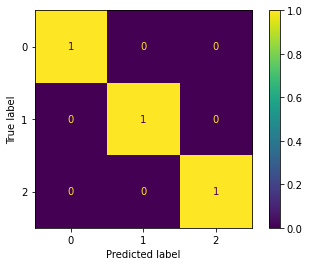

In [5]:
plot_confusion_matrix(rf,inp_tr,tar_tr,normalize='true')

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


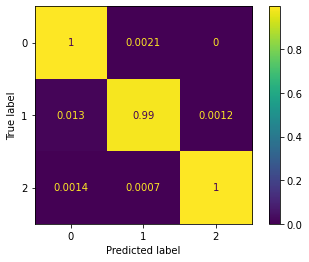

In [26]:
plot_confusion_matrix(rf,inp_va,tar_va,normalize='true')

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


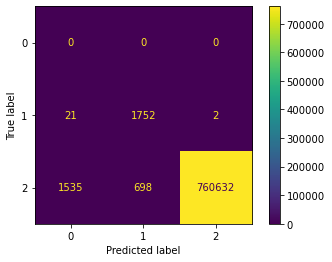

In [7]:
plot_confusion_matrix(rf,inp_te,tar_te)

In [92]:
inputs = input
testset = "NGC_2264"#"../../Archive/Phase_1__Three_Class_Classification/Data_and_Results/catalog"
testin = pd.read_csv(f"{testset}.csv")
# Collect the column names of magnitudes and errors
# testin.columns = ['index','mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4', 'mag_MP1', 'e_mag_MP1','Target','pred','P(CI)', 'P(CII)', 'P(Other)']

bands = [idx for idx in testin.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]

bands.append("alpha")
# if 'target' not in testin.columns.values:
#     testin['Target'] = np.random.randint(low = 0,high=3,size=testin.shape[0])
#     Predict = True
if len(np.unique(testin[['Target']].values)) > 3:
    print(testin.shape)
    print(np.unique(testin[['Target']].values))
    testin.replace({'Target':1},{'Target':0},inplace=True)
    testin.replace({'Target':2},{'Target':1},inplace=True)
    testin.replace({'Target':3},{'Target':1},inplace=True)
    # testin.replace({'Target':4},{'Target':1},inplace=True)
    # testin.replace({'Target':5},{'Target':1},inplace=True)
    testin.replace({'Target':6},{'Target':2},inplace=True)
    
    testin.drop(testin[testin.Target>2].index,inplace=True)
    print(np.unique(testin[['Target']].values))
    print(testin.shape)


inp_tr, tar_tr = replicate_data_single(inputs[bands].values.astype(float), inputs[['Target']].values.astype(int),[len(np.where(inputs[['Target']].values==0)[0]),len(np.where(inputs[['Target']].values==1)[0]),int(len(np.where(inputs[['Target']].values==2)[0])/100)])#,len(np.where(Y_te==3.)[0]),len(np.where(Y_te==4.)[0]),len(np.where(Y_te==5.)[0])])
while np.all(np.isfinite(inp_tr)) == False:
    inp_tr, tar_tr = replicate_data_single(inputs[bands].values.astype(float), inputs[['Target']].values.astype(int),[len(np.where(inputs[['Target']].values==0)[0]),len(np.where(inputs[['Target']].values==1)[0]),int(len(np.where(inputs[['Target']].values==2)[0])/100)])

inp_te, tar_te = replicate_data_single(testin[bands].values.astype(float), testin[['Target']].values.astype(int),[len(np.where(testin[['Target']].values==0)[0]),len(np.where(testin[['Target']].values==1)[0]),len(np.where(testin[['Target']].values==2)[0])])#,len(np.where(Y_te==3.)[0]),len(np.where(Y_te==4.)[0]),len(np.where(Y_te==5.)[0])])
while np.all(np.isfinite(inp_te)) == False:
    inp_te, tar_te = replicate_data_single(testin[bands].values.astype(float), testin[['Target']].values.astype(int),[len(np.where(testin[['Target']].values==0)[0]),len(np.where(testin[['Target']].values==1)[0]),len(np.where(testin[['Target']].values==2)[0])])#,len(np.where(Y_te==3.)[0]),len(np.where(Y_te==4.)[0]),len(np.where(Y_te==5.)[0])])


(8445, 17)
[0 1 2 3 6]
[0 1 2]
(8445, 17)


/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


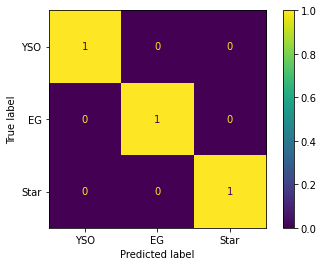

In [93]:
rf.fit(inp_tr,tar_tr.ravel())

plot_confusion_matrix(rf,inp_tr,tar_tr,normalize='true',display_labels=['YSO','EG','Star'])

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


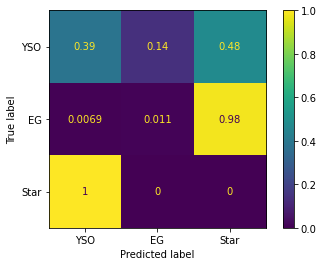

In [94]:

plot_confusion_matrix(rf,inp_te,tar_te,normalize='true',display_labels=['YSO','EG','Star'])

In [95]:
# testin.head()

In [96]:
# testin.columns

In [97]:
print(bands)

['mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4', 'mag_MP1', 'e_mag_MP1', 'alpha']


In [98]:
from PRF import prf

In [99]:
X_train = inp_tr[:,(0,2,4,6)]
dX_train = inp_tr[:,(1,3,5,7)]
y_train = tar_tr

# X_val = inp_va[:,(0,2,4,6,8,10,12,14)]
# dX_val = inp_va[:,(1,3,5,7,9,11,13,15)]
# y_val = tar_va


X_test = inp_te[:,(0,2,4,6)]
dX_test = inp_te[:,(1,3,5,7)]
y_test = tar_te


In [100]:

prf_cls = prf(n_estimators=100, bootstrap=True, keep_proba=0.05)
prf_cls.fit(X=X_train, dX=dX_train, y=y_train)

ProbabilisticRandomForestClassifier(n_estimators_='100', criterion='gini', max_features='auto', max_depth='None', keep_proba='0.05', bootstrap='True', min_py_sum_leaf='1', n_features_='4', feature_importances_='[0.08036066 0.11071789 0.17924567 0.44008582]', max_features_num='2', unsupervised='False', n_classes_='3')

In [101]:

pred_tr = prf_cls.predict(X=X_train, dX=dX_train)
# pred_va = prf_cls.predict(X=X_val, dX=dX_val)
pred_te = prf_cls.predict(X=X_test, dX=dX_test)

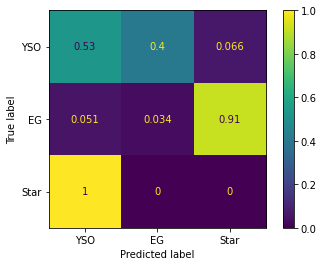

In [102]:
ConfusionMatrixDisplay.from_predictions(tar_te,pred_te,normalize='true',display_labels=['YSO','EG','Star'])

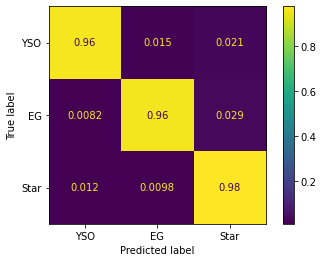

In [103]:
ConfusionMatrixDisplay.from_predictions(tar_tr,pred_tr,normalize='true',display_labels=['YSO','EG','Star'])